# Introduction to Quantum Computing

## What is Quantum Computing and How is it Different From Classical Computing?

Quantum computing represents a groundbreaking shift in the world of computing, leveraging the principles of quantum mechanics to process information in ways that classical computing cannot. Unlike classical computers, which use singular bits as the smallest unit of data (with each bit being a 1 or a 0), quantum computers use quantum bits, or qubits. Qubits have the ability to exist in multiple states simultaneously, thanks to superposition, and can be entangled with one another, a property that allows them to be interconnected in ways that bits never can. The property of entanglement is central to quantum computing because it forces the data in one qubit to change due to the mutation of another qubit that it is entangled to, allowing for benefits like security and parallel computation. In order to entangle qubits in a given system, they must be run through a certain type of gate that entangles them. Quantum gates are essential to quantum computing, as they manipulate the state of qubits by applying mathematical operations on it. These fundamental differences enable quantum computers to perform complex calculations at speeds unattainable by traditional machines, making them exceptionally powerful for tasks such as cryptography, material science, pharmaceutical research, and solving difficult optimization problems. The unique capabilities of quantum computing not only challenge the limits of classical computing but also hold the promise to revolutionize industries by providing solutions to problems that are currently beyond reach, marking a significant leap forward in computer science.


## How do Classical Computers Simulate Quantum Machines?

Quantum computers are large, expensive, extremely difficult to maintain, and relatively inaccessible. Thus, companies like IBM have made it possible to simulate quantum computers on both quantum and classical machines through the Qiskit software development kit (version 0.46), which adds all of the computation & visualization tools necessary to begin working with quantum computers and understanding how they process data. Essentially, Qiskit translates quantum algorithms into simulations that can run on classical computers. While it's understood that simulating a quantum system on a classical computer can become exponentially harder as the system grows (which will be addressed later on in this notebook), Qiskit offers an invaluable development platform for smaller-scale quantum algorithms and circuits. It employs classical bits to represent quantum data in these simulations, providing a way to visualize and understand the outcomes of quantum computations without directly observing qubits, which would be impossible on classical hardware. The way Qiskit uses classical bits to represent quantum data involves the simulation of quantum states and operations with classical data structures and algorithms. When a quantum program is executed, the quantum state, which is typically represented by complex vectors and matrices in quantum mechanics, is simulated using arrays and linear algebra operations on a classical computer. The results of quantum operations, such as the measurement of qubits, are translated into classical information, allowing users to interpret the outcomes of quantum algorithms through familiar classical data. Below, I have constructed an elementary circuit and will demonstrate it through giving a histogram of the data as well as a visualization of the circuit itself. The histogram tells about the number of times each state was observed in this specific circuit. I have set shots equal to 1024 in order to measure the circuit 1024 times, giving an accurate representation of the statistical data that might be yielded on an actual quantum computer. In the circuit below, I have created a 4-qubit system, and applied a few different gates to the qubits in order to manipulate the states. The first gate I applied is a Hadamard gate on qubit 0, which puts this qubit into an equal superposition of $\left| 0 \right>$ and $\left| 1 \right>$. Then I applied a Pauli X gate on qubit 1, which essentially causes a bit flip (so if it were in the $\left| 1 \right>$ state, a Pauli x gate would flip it to $\left| 0 \right>$). Next, I  applied a Pauli y gate on qubit 2, which applies both a bit flip and a phase shift. Finally, I applied a variational (RX) gate to qubit 3 with $\theta$=$\frac{\pi}{4}$, which rotates the statevector around the x-axis by an angle of $\frac{\pi}{4}$. This circuit does not have any practical usefulness, rather, I have prepared it to demonstrate how a simple circuit composed of a few qubits and a few gates works.


In [1]:
import qiskit
import qiskit_aer
import numpy
import matplotlib
import time
from qiskit import Aer, execute, QuantumCircuit
from qiskit.visualization import plot_histogram

/var/folders/bn/75fgjtjj3bg7j3kt7wvg5fcr0000gn/T/ipykernel_21717/625820102.py:8: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  result = execute(qc, backend=simulator, shots=1024).result()


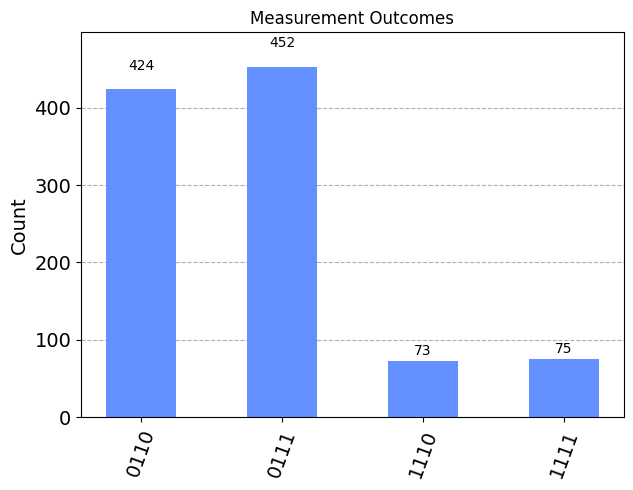

In [19]:
qc = QuantumCircuit(4, 4)
qc.h(0)
qc.x(1) 
qc.y(2)
qc.rx(numpy.pi/4, 3)
qc.measure(range(4), range(4))
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=simulator, shots=1024).result()
counts = result.get_counts(qc)
plot_histogram(counts, title="Measurement Outcomes")

In [20]:
qc = QuantumCircuit(4, 4)
qc.h(0)
qc.x(1)
qc.y(2)
qc.rx(numpy.pi, 3)
qc.measure(range(4), range(4))
qc.draw()


┌───┐  ┌─┐         
q_0: ──┤ H ├──┤M├─────────
       ├───┤  └╥┘┌─┐      
q_1: ──┤ X ├───╫─┤M├──────
       ├───┤   ║ └╥┘┌─┐   
q_2: ──┤ Y ├───╫──╫─┤M├───
     ┌─┴───┴─┐ ║  ║ └╥┘┌─┐
q_3: ┤ Rx(π) ├─╫──╫──╫─┤M├
     └───────┘ ║  ║  ║ └╥┘
c: 4/══════════╩══╩══╩══╩═
               0  1  2  3

# How Might Quantum Circuits Yield Useful Results?

So far, I have only shown you circuits that take some qubits with an initial state and then apply a series of gates to them in order to show the progression of the data. These circuits are useful for learning how quantum systems deal with data, but they don't provide any useful results. The next circuits that I have prepared actually yield some useful information. They are simple implementations of grover's algorithm, which is designed for searching through unsorted databases with a quadratic speedup compared to classical algorithms. Although the advantage is much more visible for large databases, a simplified version on a small scale can still demonstrate the principles of this quantum algorithm. Essentially, in a quantum circuit of n qubits, grover's algorithm can find some number k, where 0 $\leq$ k $\leq$ $2^n$, by assigning values to each state. For example, in a system of 2 qubits, there are $2^2$=4 possible combinations of states, meaning that I can search for any number 0, 1, 2, or 3 (or 1, 2, 3, or 4) by marking the state that I want (like 0 = $\left| 00 \right>$ or 3 = $\left| 11 \right>$) and performing grover's algorithm on that system. So, large quantum computers with millions of qubits will be able to search for any number up to N=$2^n$ with a time complexity of O($\sqrt N$), which is a vast improvement over classical algorithms that cap out at O(N). I have prepared two different implementations of grover's algorithm, one which finds the $\left| 11 \right>$ state in a 2-qubit system, and one which finds the $\left| 10 \right>$ state in that same 2-qubit system. In each of them, I constructed the 2-qubit circuit, then applied a hadamard gate on each of the qubits to put them into superposition. After, I applied an "oracle" to the circuit, which is essentially a way to tell the algorithm what to look for by applying a phase shift to the desired state. Then, I ran the circuit through the diffusion operator, which in this simplified version of grover's algorithm, is a series of gates that is applied to the qubits in order to produce the result. This implementation of Grover's algorithm manipulates the entire quantum system's state such that the probability of measuring the desired outcome is maximized. This is achieved through a sophisticated use of quantum phase manipulation (by the oracle) and amplitude amplification (by the diffusion operator), culminating in a high likelihood of measuring the solution state (in my case, the likelihood is 100% because that is the accuracy of Grover's algorithm on a 2-qubit system--I will discuss the accuracy of Grover's algorithm more in depth later on in the notebook). The algorithm leverages the unique properties of quantum systems, such as superposition and interference, in a way that has no direct analogue in classical computing. Thus, it demonstrates the potential of creative quantum algorithms to solve certain problems more efficiently than their classical counterparts. However, this is a simplified version of what Grover's algorithm does and a practical application of the actual algorithm requires an iterative process of applying an oracle and a diffusion operator designed to amplify a marked solution state out of many possible states.


/var/folders/bn/75fgjtjj3bg7j3kt7wvg5fcr0000gn/T/ipykernel_21717/3941774864.py:15: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  result = execute(qc, backend=simulator, shots=1024).result()


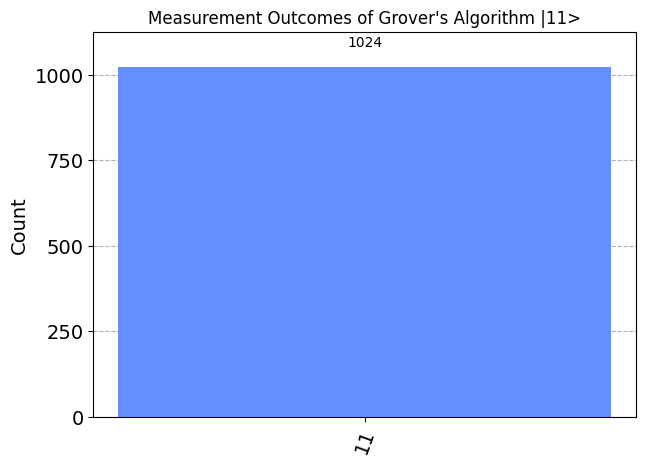

In [21]:
def oracle(circuit):
    circuit.cz(0, 1) #Flips phase of |11>

def diffusion_operator(circuit):
    circuit.z([0, 1])  #Flips phase of |1>  (without affecting |0>)
    circuit.cz(0, 1)   #Flips phase of |11>
    circuit.h([0, 1])  #Tranforms back to computational basis

qc = QuantumCircuit(2, 2)
qc.h([0, 1])   #Prepare the initial state to be a superpositon and not ground state (in order to actually manipulate the data)
oracle(qc)
diffusion_operator(qc)
qc.measure([0, 1], [0, 1])
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=simulator, shots=1024).result()
counts = result.get_counts(qc)
plot_histogram(counts, title="Measurement Outcomes of Grover's Algorithm |11>")

In [22]:
def oracle(circuit):
    circuit.cz(0, 1)

def diffusion_operator(circuit):
    circuit.z([0, 1])  #Flips phase of |1>  (without affecting |0>)
    circuit.cz(0, 1)   #Flips phase of |11>
    circuit.h([0, 1])  #Transforms back to computational basis

qc = QuantumCircuit(2, 2)
qc.h([0, 1])   #Prepare the initial state to be a superpositon and not ground state (in order to actually manipulate the data)
oracle(qc)
diffusion_operator(qc)
qc.draw()


┌───┐   ┌───┐   ┌───┐
q_0: ┤ H ├─■─┤ Z ├─■─┤ H ├
     ├───┤ │ ├───┤ │ ├───┤
q_1: ┤ H ├─■─┤ Z ├─■─┤ H ├
     └───┘   └───┘   └───┘
c: 2/═════════════════════

/var/folders/bn/75fgjtjj3bg7j3kt7wvg5fcr0000gn/T/ipykernel_21717/2889509946.py:19: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  result = execute(qc, backend=simulator, shots=1024).result()


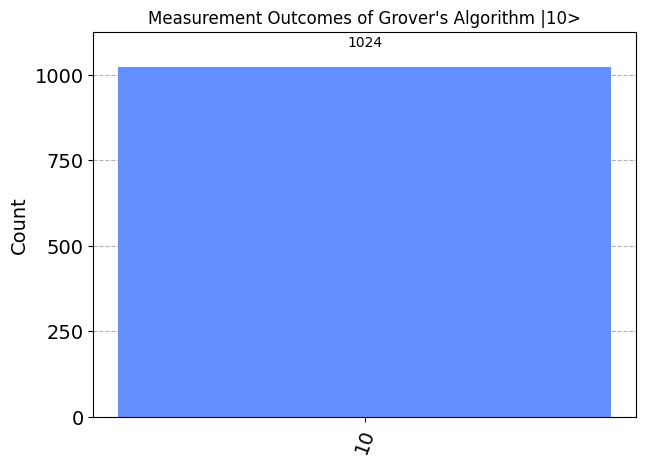

In [23]:
def oracle_10(circuit):
    qc.x(0) #Ensures qubit is in |1> when |10> is targeted
    qc.cz(0, 1)  #Flips phase for |11>
    qc.x(0)   

def diffusion_operator(circuit):
    qc.h([0, 1])  # Return to the superposition
    qc.x([0, 1])  # Invert qubits for the diffusion condition
    qc.cz(0, 1)  # Apply CZ as part of creating the condition for inversion
    qc.x([0, 1])  # Revert the inversion of qubits
    qc.h([0, 1])

qc = QuantumCircuit(2, 2)
qc.h([0, 1]) #Prepare the initial state to be a superpositon and not ground state (in order to actually manipulate the data)
oracle_10(qc)
diffusion_operator(qc)
qc.measure([0, 1], [0, 1])
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=simulator, shots=1024).result()
counts = result.get_counts(qc)
plot_histogram(counts, title="Measurement Outcomes of Grover's Algorithm |10>")

In [24]:
def oracle_10(circuit):
    qc.x(0)  #Ensures qubit is in |1> when |10> is targeted
    qc.cz(0, 1)  #Flips phase for |11>
    qc.x(0)   

def diffusion_operator(circuit):
    qc.h([0, 1])  # Return to the superposition
    qc.x([0, 1])  # Invert qubits for the diffusion condition
    qc.cz(0, 1)  # Apply CZ as part of creating the condition for inversion
    qc.x([0, 1])  # Revert the inversion of qubits
    qc.h([0, 1])

qc = QuantumCircuit(2, 2)
qc.h([0, 1]) #Prepare the initial state to be a superpositon and not ground state (in order to actually manipulate the data)
oracle_10(qc)
diffusion_operator(qc)
qc.measure([0, 1], [0, 1])
qc.draw()


┌───┐┌───┐   ┌───┐┌───┐┌───┐   ┌───┐┌───┐┌─┐   
q_0: ┤ H ├┤ X ├─■─┤ X ├┤ H ├┤ X ├─■─┤ X ├┤ H ├┤M├───
     ├───┤└───┘ │ ├───┤├───┤└───┘ │ ├───┤├───┤└╥┘┌─┐
q_1: ┤ H ├──────■─┤ H ├┤ X ├──────■─┤ X ├┤ H ├─╫─┤M├
     └───┘        └───┘└───┘        └───┘└───┘ ║ └╥┘
c: 2/══════════════════════════════════════════╩══╩═
                                               0  1

## Fully-Encompassing Implementation of Grover's Algorithm (from IBM)

Below is a fully functional implementation of Grover's algorithm pulled from IBM's website (with a few modifications), and it showcases what a more complex version of the algorithm looks like. By changing the strings in the "marked_states" array, the algorithm can search for different states and in circuits of varying qubit size. This implementation runs with high but not perfect accuracy (in cases where there are more qubits), but if "marked_states" is changed to "10", signifying a 2 qubit system, then it will run with 100% accuracy. The accuracy of retrieving the correct result from grover's algorithm is given by a sine function: $sin^2$((r+12)$\theta$), where r is the number of Grover iterations and $\theta$ is the angle between the starting state $\left| S \right>$ and the final state $\left| S' \right>$. So, the accuracy will oscillate up and down depending on number of all elements and number of Grover iterations. In order to compare and contrast the difference in runtime between this implementation of Grover's algorithm and a classical number search, I will be looking at the number of measurements/calculations required to complete (because using time as a metric does not make sense for simulations of quantum systems due to the bottlenecking of hardware).


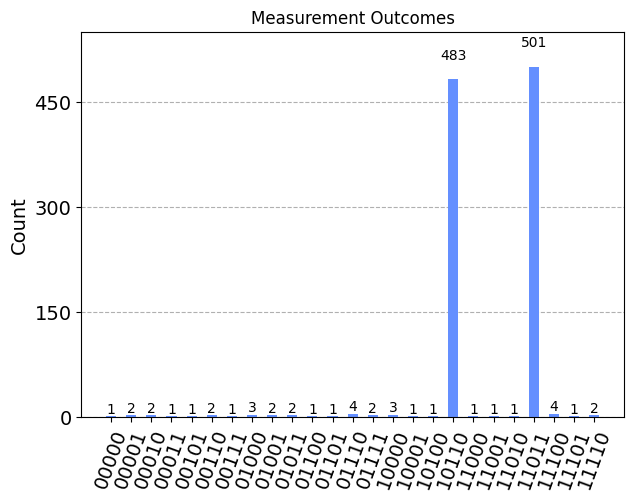

In [5]:
# Imports from Qiskit Runtime
from qiskit.circuit.library import MCMT, ZGate, GroverOperator
import math

simulator = Aer.get_backend('qasm_simulator')

def grover_oracle(marked_states):
    if not isinstance(marked_states, list):
        marked_states = [marked_states]
    # Compute the number of qubits in circuit
    num_qubits = len(marked_states[0])

    qc = QuantumCircuit(num_qubits)
    # Mark each target state in the input list
    for target in marked_states:
        # Flip target bit-string to match Qiskit bit-ordering
        rev_target = target[::-1]
        # Find the indices of all the '0' elements in bit-string
        zero_inds = [ind for ind in range(num_qubits) if rev_target.startswith("0", ind)]
        # Add a multi-controlled Z-gate with pre- and post-applied X-gates (open-controls)
        # where the target bit-string has a '0' entry
        qc.x(zero_inds)
        qc.compose(MCMT(ZGate(), num_qubits - 1, 1), inplace=True)
        qc.x(zero_inds)
    return qc

marked_states = ["11011", "10110"]
oracle = grover_oracle(marked_states)
oracle.draw(output="mpl", style="iqp")
grover_op = GroverOperator(oracle)
grover_op.decompose().draw(output="mpl", style="iqp")
optimal_num_iterations = math.floor(
    math.pi / (4 * math.asin(math.sqrt(len(marked_states) / 2**grover_op.num_qubits)))
)
qc = QuantumCircuit(grover_op.num_qubits)
# Create even superposition of all basis states
qc.h(range(grover_op.num_qubits))
# Apply Grover operator the optimal number of times
qc.compose(grover_op.power(optimal_num_iterations), inplace=True)
# Measure all qubits
qc.measure_all()
qc.draw(output="mpl", style="iqp")
job = simulator.run(qiskit.transpile(qc, simulator), shots = 1024)
result = job.result()
counts = result.get_counts(qc)
plot_histogram(counts, title="Measurement Outcomes")

## What Allows Quantum Computing to be Faster than Classical Computing?

Now, I will provide some insights into how quantum computers are much faster than classical computers. Qubits, unlike classical bits, can exist in a state of superposition, where they represent multiple states ($\left| 0 \right>$ and $\left| 1 \right>$) simultaneously. This allows quantum computers to perform calculations on a massive scale in parallel within a single operation. For example, while a classical computer with n bits can only be in one of $2^n$ possible states at any given time, a quantum computer with n qubits can be in a superposition of all $2^n$ states at once, theoretically allowing it to process data at exponentially faster rates for certain types of calculations. Additionally, quantum entanglement helps out with performing calculations at an extremely fast rate. Quantum entanglement is where qubits become interconnected in such a way that the state of one (no matter how far apart they are) instantaneously depends on the state of another. This property enables quantum computers to perform complex operations and solve certain problems much more efficiently than classical systems. Entangled qubits can provide a quantum computer with a deeper level of parallelism and correlation that is not possible with classical bits, enhancing the computer's ability to quickly solve problems like optimization and simulation that would take classical computers impractically long to solve. This theoretical speedup offered by quantum computing has been demonstrated in several practical quantum algorithms that significantly improve computation time compared to that of classical counterpart. Shor's algorithm can factor large numbers in polynomial time, which is much faster than the best known classical algorithms, and Grover's algorithm provides a quadratic speedup for unsorted database searches. Thus, quantum computing excels in solving complex problems such as cryptography and optimization tasks that are intractable for classical computers, while classical computing remains superior for general-purpose applications, large-scale data processing, and tasks requiring high precision and reliability, showcasing the complementary strengths of both computing paradigms in their respective domains.


In [7]:
def create_and_simulate_circuit(num_qubits, draw=False) :
    qc = QuantumCircuit(num_qubits, num_qubits, name=f'Circ{num_qubits}', global_phase=0)
    for qubit in range(num_qubits):
        qc.h(qubit)
        qc.rz(numpy.random.random(), qubit)
        if (qubit != num_qubits-1) :
            qc.cy(qubit, qubit+1) 
        else :
            qc.h(0)

    qc.barrier(range(num_qubits))
    qc.measure(range(num_qubits), range(num_qubits))
    
    simulator = Aer.get_backend('qasm_simulator')
    job = simulator.run(qiskit.transpile(qc, simulator), shots = 1024)
    result = job.result()
    counts = result.get_counts(qc)

    if draw : 
        display(qc.draw(style='iqp'))
        display(plot_histogram(counts))
    
    return counts


┌───┐┌─────────────┐     ┌───┐                                         ░ »
q_0: ┤ H ├┤ Rz(0.29026) ├──■──┤ H ├─────────────────────────────────────────░─»
     └───┘└─────────────┘┌─┴─┐├───┤┌─────────────┐                          ░ »
q_1: ────────────────────┤ Y ├┤ H ├┤ Rz(0.43995) ├──■───────────────────────░─»
                         └───┘└───┘└─────────────┘┌─┴─┐┌───┐┌─────────────┐ ░ »
q_2: ─────────────────────────────────────────────┤ Y ├┤ H ├┤ Rz(0.14368) ├─░─»
                                                  └───┘└───┘└─────────────┘ ░ »
c: 3/═════════════════════════════════════════════════════════════════════════»
                                                                              »
«     ┌─┐      
«q_0: ┤M├──────
«     └╥┘┌─┐   
«q_1: ─╫─┤M├───
«      ║ └╥┘┌─┐
«q_2: ─╫──╫─┤M├
«      ║  ║ └╥┘
«c: 3/═╩══╩══╩═
«      0  1  2

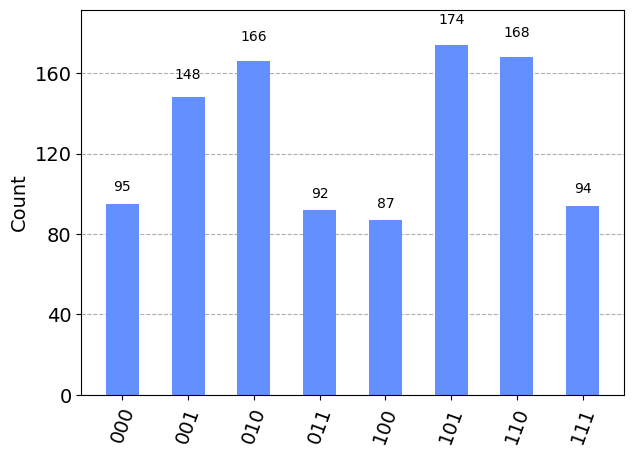

{'011': 92,
 '111': 94,
 '001': 148,
 '100': 87,
 '110': 168,
 '101': 174,
 '000': 95,
 '010': 166}

In [9]:
create_and_simulate_circuit(3, True)

## Circuit Scaling

Now, I will begin to explore how simulations of quantum circuits scale on classical machines. Because classical computers do not have actual qubits (which can be $\left| 0 \right>$, $\left| 1 \right>$ or a superposition of $\left| 0 \right>$ and $\left| 1 \right>$), they instead have to "simulate" qubits using 2 real bits. As you might imagine, this takes up a lot of physical space in memory because for an n qubit circuit, classical simulations of this system require $2^n$ bits. I have prepared a function that runs circuits of n qubits and a depth of n, and plots their computation times. I would like to see how a varying number of qubits and depth, thermal stress, and caching affect computation time on a classical computer, and this will tell me about the scaling of these quantum simulations. Below is a picture of an example circuit with a depth of 15 to illustrate how the circuits that I am using to scale actually look.

┌───┐┌─────────────┐     ┌───┐                                        »
 q_0: ┤ H ├┤ Rz(0.48529) ├──■──┤ H ├────────────────────────────────────────»
      └───┘└─────────────┘┌─┴─┐├───┤┌─────────────┐                         »
 q_1: ────────────────────┤ Y ├┤ H ├┤ Rz(0.32856) ├──■──────────────────────»
                          └───┘└───┘└─────────────┘┌─┴─┐┌───┐┌─────────────┐»
 q_2: ─────────────────────────────────────────────┤ Y ├┤ H ├┤ Rz(0.70248) ├»
                                                   └───┘└───┘└─────────────┘»
 q_3: ──────────────────────────────────────────────────────────────────────»
                                                                            »
 q_4: ──────────────────────────────────────────────────────────────────────»
                                                                            »
 q_5: ──────────────────────────────────────────────────────────────────────»
                                                                            »
 q_6: ──────────────────────────────────────────────────────────────────────»
                                                                            »
 q_7: ──────────────────────────────────────────────────────────────────────»
                                                                            »
 q_8: ──────────────────────────────────────────────────────────────────────»
                                                                            »
 q_9: ──────────────────────────────────────────────────────────────────────»
                                                                            »
q_10: ──────────────────────────────────────────────────────────────────────»
                                                                            »
q_11: ──────────────────────────────────────────────────────────────────────»
                                                                            »
q_12: ──────────────────────────────────────────────────────────────────────»
                                                                            »
q_13: ──────────────────────────────────────────────────────────────────────»
                                                                            »
q_14: ──────────────────────────────────────────────────────────────────────»
                                                                            »
c: 15/══════════════════════════════════════════════════════════════════════»
                                                                            »
«                                                                    »
« q_0: ──────────────────────────────────────────────────────────────»
«                                                                    »
« q_1: ──────────────────────────────────────────────────────────────»
«                                                                    »
« q_2: ──■───────────────────────────────────────────────────────────»
«      ┌─┴─┐┌───┐┌──────────────┐                                    »
« q_3: ┤ Y ├┤ H ├┤ Rz(0.098352) ├──■─────────────────────────────────»
«      └───┘└───┘└──────────────┘┌─┴─┐┌───┐┌──────────────┐          »
« q_4: ──────────────────────────┤ Y ├┤ H ├┤ Rz(0.015251) ├──■───────»
«                                └───┘└───┘└──────────────┘┌─┴─┐┌───┐»
« q_5: ────────────────────────────────────────────────────┤ Y ├┤ H ├»
«                                                          └───┘└───┘»
« q_6: ──────────────────────────────────────────────────────────────»
«                                                                    »
« q_7: ──────────────────────────────────────────────────────────────»
«                                                                    »
« q_8: ──────────────────────────────────────────────────────────────»
«                                                                    »
« q_9: ──────────────────────────────────────────────────────────────»
«           

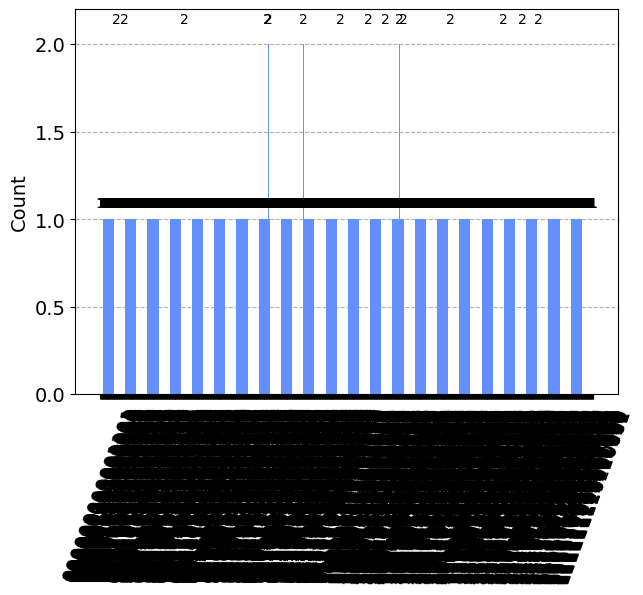

{'001000010010101': 1,
 '100000010110010': 1,
 '100100111010100': 1,
 '000100110100010': 1,
 '100011111001000': 1,
 '100110110001010': 1,
 '011011001000110': 1,
 '001010000110000': 1,
 '011100010010101': 1,
 '110101010110010': 1,
 '010000101110010': 1,
 '100000101110010': 1,
 '001111011000001': 1,
 '010011010010110': 1,
 '010001100101110': 1,
 '000111001001110': 1,
 '000001001101001': 1,
 '110100110001010': 1,
 '100011111011101': 1,
 '010011011101100': 1,
 '101100001000001': 1,
 '010111001100010': 1,
 '101001110111010': 1,
 '010111010001010': 1,
 '011110111001101': 1,
 '000101001000001': 1,
 '011100010110011': 1,
 '010100010111101': 1,
 '100101100001110': 1,
 '110100111011011': 1,
 '010011100001110': 1,
 '010000011011111': 1,
 '011101000010001': 1,
 '101001110110111': 1,
 '011010101010010': 1,
 '001100001000010': 1,
 '111100111110011': 1,
 '111111011011010': 1,
 '001010110001111': 1,
 '001000101111111': 1,
 '010010110101101': 1,
 '101110011011101': 1,
 '001011110001010': 1,
 '001101000

In [8]:
create_and_simulate_circuit(15, True)

In [7]:
num_runs = 10
forwards_unplugged_x = numpy.array(range(1,26))
forwards_unplugged_y = []

for i in forwards_unplugged_x :
    start = time.time()
    for j in range(num_runs) :
        create_and_simulate_circuit(i)
    end = time.time()
    forwards_unplugged_y.append((end-start)/num_runs)

In [8]:
num_runs = 10
backwards_unplugged_x = numpy.array(range(1,26))[::-1]
backwards_unplugged_y = []

for i in backwards_unplugged_x :
    start = time.time()
    for j in range(num_runs) :
        create_and_simulate_circuit(i)
    end = time.time()
    backwards_unplugged_y.append((end-start)/num_runs)

In [9]:
num_runs = 10
forwards_plugged_x = numpy.array(range(1,26))
forwards_plugged_y = []

for i in forwards_plugged_x :
    start = time.time()
    for j in range(num_runs) :
        create_and_simulate_circuit(i)
    end = time.time()
    forwards_plugged_y.append((end-start)/num_runs)

In [10]:
num_runs = 10
backwards_plugged_x = numpy.array(range(1,26))[::-1]
backwards_plugged_y = []

for i in backwards_plugged_x :
    start = time.time()
    for j in range(num_runs) :
        create_and_simulate_circuit(i)
    end = time.time()
    backwards_plugged_y.append((end-start)/num_runs)

Equation for the fit 1-18: y = 0.06x + -4.42
Equation for the fit 19-25: y = 0.64x + -14.95


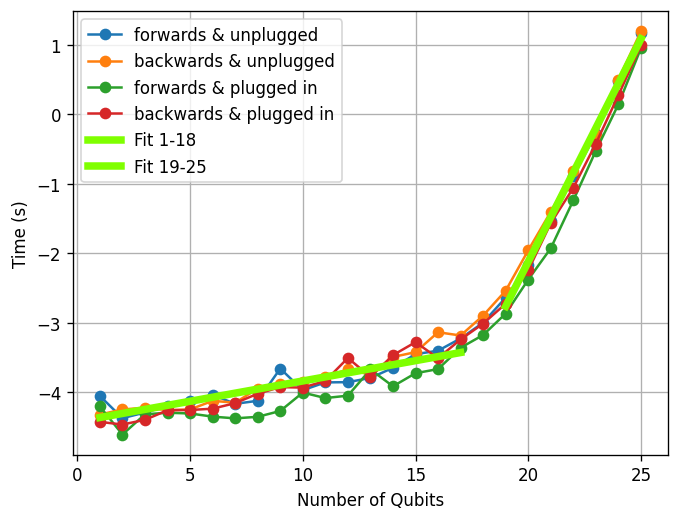

In [42]:
from matplotlib import pyplot as plt
from scipy import stats

plt.figure(dpi=120)

xfu1, yfu1 = forwards_unplugged_x[:17], numpy.log(forwards_unplugged_y[:17])  
xfu2, yfu2 = forwards_unplugged_x[18:], numpy.log(forwards_unplugged_y[18:])
slopefu1, interceptfu1, _, _, _ = stats.linregress(xfu1, yfu1)
slopefu2, interceptfu2, _, _, _ = stats.linregress(xfu2, yfu2)

print(f'Equation for the fit {forwards_unplugged_x[0]}-{forwards_unplugged_x[17]}: y = {slopefu1:.2f}x + {interceptfu1:.2f}')
print(f'Equation for the fit {forwards_unplugged_x[18]}-{forwards_unplugged_x[-1]}: y = {slopefu2:.2f}x + {interceptfu2:.2f}')

yfu_fit1 = slopefu1 * xfu1 + interceptfu1
yfu_fit2 = slopefu2 * xfu2 + interceptfu2

plt.plot(forwards_unplugged_x, numpy.log(forwards_unplugged_y), 'o-', label='forwards & unplugged')
plt.plot(backwards_unplugged_x, numpy.log(backwards_unplugged_y), 'o-', label='backwards & unplugged')
plt.plot(forwards_plugged_x, numpy.log(forwards_plugged_y), 'o-', label='forwards & plugged in')
plt.plot(backwards_plugged_x, numpy.log(backwards_plugged_y), 'o-', label='backwards & plugged in')
plt.plot(xfu1, yfu_fit1, 'chartreuse', label=f'Fit {forwards_unplugged_x[0]}-{forwards_unplugged_x[17]}', linewidth=4.5) 
plt.plot(xfu2, yfu_fit2, 'chartreuse', label=f'Fit {forwards_unplugged_x[18]}-{forwards_unplugged_x[-1]}', linewidth=4.5) 
plt.grid()
plt.xlabel('Number of Qubits')
plt.ylabel('Time (s)')
plt.legend()

## Explanation of the Data
I timed each of these circuits using the time() function in python's time module, and ran them 10 times to average out the time over those ten runs, and I have found that at around 16-18 qubits, there is a hardware bottleneck causing computation time to rise exponentially. In order to determine the growth rate, I fit neon green linear regression lines to the forwards_unplugged data (because all of the different methods have similar results) on a logarithmic scale. For systems of 1-16 qubits, the computation time rose steadily with a slope of about 0.06. Then, in systems from 19-25 qubits, the slope rose much more dramatically from 0.06 to 0.67. The main cause of this bottleneck is due to lack of RAM, since the classical simulation of a quantum system requires $2^n$ bits to store all of the necessary information. Also, when dealing with this much data, the speed at which the CPU can retrieve this data (memory bandwidth) grows quickly because it needs to look through a larger pool of data. Overall, this extreme growth in computation time is because classical systems lack the physical space as well as the parallel computation capabilities to simulate systems of any more than about 30 qubits. Caching also plays an important role in the computation time, which is why I ran the circuit forwards, backwards, plugged in, and unplugged to see if it makes a difference, but it only seems to play a tiny role as all four circuits required a similar total time to complete. Additionally, I wanted to see if thermal limits affected computation time, and by running the circuit forwards and backwards, there didn't seem to be a large difference, so I posit that it doesn't actually have much influence over the total computation time. My 2020 intel i5 Mac laptop was only able to run quantum systems of 26 qubits maximum without running into hardware limits, but it only has 8 gigabytes of RAM, so a more powerful computer with more RAM (e.g 16+ gigabytes) and a faster CPU will probably be able to run systems of up to 30 qubits without running into issues. In conclusion, when dealing with practical quantum systems (that have many more than 30 qubits), it is necessary to study a its behavior on an actual quantum computer either through cloud service or direct access to a quantum machine because the classical simulations of them run into HW bottlenecks that cause excessive computation time.

## Try it for yourself!

If you want to see how your computer or laptop scales these circuits, make sure to run all of the preliminary cells in the notebook including the import cell and the create_and_simulate_circuit cell. Then, run the forwards and backwards unplugged cells (if you are on a laptop, unplug it from power) and the forwards and backwards plugged in cells (with your laptop plugged in) and finally run the plotting cell to see your results!

## How Much Faster are Quantum Computers Compared to Classical Computers?

The reason that I have been discussing scaling is because quantum computers with a large number of qubits (over 10,000,000), can solve certain algorithms much faster than classical computers. I have already mentioned that Grover's algorithm is fast, but actually, it is near optimal--and not perfectly optimal, as there is a small chance to measure the wrong state/number--due to the underlying quantum mechanics at work. Another algorithm that quantum computers have successfully been able to achieve is Shor's algorithm, which factors a number into its two prime factors in polynomial runtime (whereas classical computers can only achieve exponential runtime). The process of factoring some number n involves finding an exponent r such that when a number k (k<n) is raised to the power of r, it equals a multiple of n+1. Essentially, quantum computers leverage their inherent ability to perform parallel computations on a massive scale due to the principles of superposition and entanglement. Shor's algorithm, by exploiting these quantum characteristics, can efficiently find the period of the function that underlies the factorization problem (with the length of the period being equal to r), a task that is exponentially harder on classical computers. This improvement in efficiency for factorization poses significant implications for cryptography, as many encryption schemes, such as RSA, rely on the difficulty of factoring large numbers as the basis for their security. So, for specific tasks that involve parallelization, quantum computers (with a large number of qubits) offer a much more efficient solution than classical computers. However, this is not necessarily true for systems of few qubits (like the ones I have shown in this notebook) because the overhead of quantum error correction, qubit initialization, manipulation, and measurement can outweigh the potential computational benefits for certain tasks. So, depending on the type of problem it is and how many resources are required from hardware, quantum computing has the potential to tremendously outperform classical computing, but it is not guaranteed.


## Complexity of Grover's Algorithm v. Classical Number Search Algorithm

While typically complexity is measured in terms of runtime, the complexity of Grover's algorithm is typically measured by query complexity--the number of times that a circuit needs to be ran through the both the oracle and diffusion operator--rather than runtime complexity because different iterations of the oracle and diffusion operators have different time complexity. As can be seen above, the time complexity of running this specific implementation of Grover's (250-500 ms) far exceeds the runtime that a classical algorithm takes (~16 $\mu$s) to find a number k in a set of N, where N is equal to 64 (or for any value of N not exceeding a certain threshold on the order of ~1,000,000). With this in mind, Grover's algorithm achieves a query complexity of O($\sqrt N$) queries, as this is the number of times required to run the circuit through those operators in order to yield the correct result. A classical search algorithm, on the other hand, has a query complexity of O(N), as in the worst case (when the desired number is at the end of the random array) N queries are required to yield the correct result. This is precisely why quantum computers are extremely useful, as in cases where N is extremely large, algorithms like Grover's quadratically reduce the number of queries needed to find the correct result. This is difficult to show through actual measurements of runtime or queries made because the runtime of a query is O(1) in classical machines and much higher in quantum simulations, so on systems of few qubits, it will look like the classical algorithm is much faster. So, let's consider a system where N = 1073741824 ($2^{30}$) and k = 100. To search for k, a classical algorithm would need to loop through at most 1073741824 times and on average $\frac{N}{2}$ = 536870912 times. Grover's algorithm reduces this to $\sqrt N$ = 32768 iterations. So, the difference between the two algorithms (on average) in terms of number of queries is on the scale of $2^{29}$ queries for the classical algorithm and $2^{15}$ queries for Grover's algorithm. As you can imagine, this discrepancy grows larger and larger as N becomes larger and the runtime of the oracle and diffusion operators essentially reduces to constant O(1) time complexity in comparison to the number of queries, making Grover's algorithm a significant improvement over the classical analogue for large N. 

Now, imagine this algorithm searching through an extremely large database (like N=$2^{100}$). An example of a search through a dataset that can grow this large is searching for a specific sentence on the internet out of all of the possible sentences. Grover's algorithm provides a theoretical speedup of this search, but in reality, there's substantial preparation work required on the qubits, which can impact the overall efficiency and feasibility of the process. Before the search can begin, each item in the database must be encoded into the quantum state of the qubits. For a database as vast as N=$2^{100}$, this means preparing a quantum system of 100 qubits in a superposition state that can represent every possible sentence on the internet. This preparation involves initializing the qubits in a ground state, typically $\left| 0 \right>$, and then applying a series of Hadamard gates to achieve a uniform superposition. While conceptually straightforward, the practical challenges of maintaining coherence and minimizing errors in such a large quantum system are non-trivial. Additionally, there would need to be a hash system in place to yield a unique identifying number to every sentence in order to actually discern between them numerically, which adds additional overhead. So, the potential of Grover's algorithm to revolutionize search tasks in quantum computing is profound, yet realizing this potential requires overcoming significant engineering and theoretical hurdles. Advances in quantum hardware, error correction techniques, algorithm optimization, and the development of more efficient oracles will be key to unlocking the practical applications of quantum search algorithms for realistic problems of this magnitude. As quantum computing technology matures, the gap between theoretical speedup and practical implementation is expected to narrow, opening up new possibilities for searching and processing information at unprecedented scales.
